In [1]:
%load_ext autoreload
%autoreload 1

import pandas as pd
import os
import sys

scriptpath = "binarygridsearch.py"
# Do the import
sys.path.append(os.path.abspath(scriptpath))

# Do the import
import binarygridsearch as bgs
%aimport binarygridsearch

In [2]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [3]:
#Define a function that just returns accuracy
def getForestAccuracy(X, y, kwargs):
    clf = RandomForestClassifier(**kwargs)
    clf.fit(X, y)
    y_pred = clf.oob_decision_function_[:, 1]
    precision, recall, _ = precision_recall_curve(y, y_pred)
    return auc(recall, precision)

In [4]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X, y = data.data, data.target

In [5]:
rfArgs = {"random_state": 0,
          "n_jobs": -1,
          "class_weight": "balanced",
         "oob_score": True}

In [6]:
n_estimators = bgs.compareValsBaseCase(X, 
                    y, 
                    getForestAccuracy,        
                    rfArgs, 
                    "n_estimators", 
                    0, 
                    32, 
                    128)

,n_estimators,score,time,scoreTimeRatio
0,32,2.542509,0.003529,1.000000
1,128,1.774372,1.003529,0.000000
2,80,2.669479,0.658506,0.003180
3,56,2.363494,0.501373,0.004099
4,68,2.615561,0.231574,0.013254
5,74,2.774372,0.695100,0.003093
6,77,2.753522,0.646641,0.003464
7,76,2.711664,0.666347,0.003202


,n_estimators,score,time
0,32,0.992455,0.170139
1,128,0.992022,0.453528
2,80,0.992526,0.355752
3,56,0.992354,0.311222
4,68,0.992496,0.234764
5,74,0.992586,0.366122
6,77,0.992574,0.352390
7,76,0.992550,0.357974


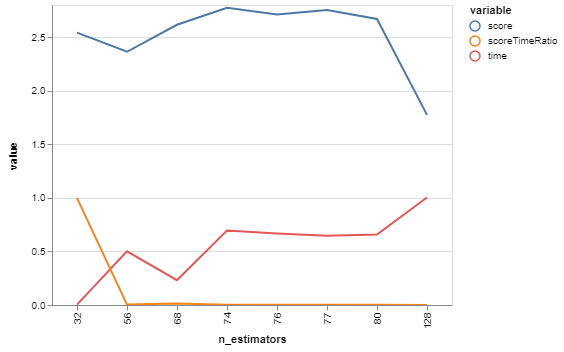

In [7]:
bgs.showTimeScoreChartAndGraph(n_estimators)

In [8]:
n_estimators = bgs.compareValsBaseCase(X, 
                    y, 
                    getForestAccuracy,        
                    rfArgs, 
                    "n_estimators", 
                    0, 
                    68, 
                    80)

,n_estimators,score,time,scoreTimeRatio
0,68,10.553601,0.103589,0.535025
1,80,10.872444,0.854601,0.016328
2,74,11.492723,0.244807,0.215433
3,71,10.492723,1.058187,0.000000
4,72,10.578646,0.058187,1.000000


,n_estimators,score,time
0,68,0.992496,0.343677
1,80,0.992526,0.356584
2,74,0.992586,0.346104
3,71,0.992490,0.360083
4,72,0.992498,0.342897


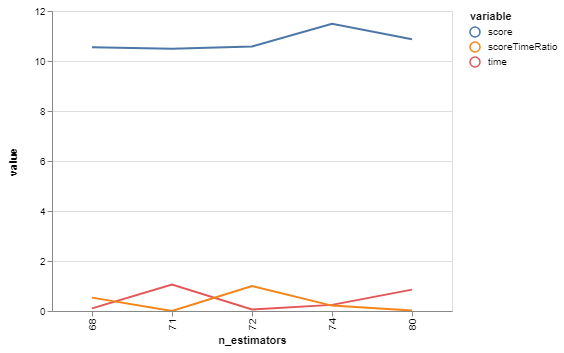

In [9]:
bgs.showTimeScoreChartAndGraph(n_estimators)